In [25]:
import pandas as pd

In [3]:
df = pd.read_json('user_data.json')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   model               10000 non-null  object
 1   pk                  10000 non-null  int64 
 2   username            10000 non-null  object
 3   financial_products  10000 non-null  object
 4   gender              10000 non-null  int64 
 5   age                 10000 non-null  int64 
 6   money               10000 non-null  int64 
 7   salary              10000 non-null  int64 
dtypes: int64(5), object(3)
memory usage: 625.1+ KB


In [5]:
df.describe

<bound method NDFrame.describe of               model     pk username  \
0     accounts.User      1    윤서준45   
1     accounts.User      2    정현아97   
2     accounts.User      3    정서은21   
3     accounts.User      4    윤민우60   
4     accounts.User      5    강채진93   
...             ...    ...      ...   
9995  accounts.User   9996    윤현진90   
9996  accounts.User   9997     조민후3   
9997  accounts.User   9998    이민진16   
9998  accounts.User   9999    최하진79   
9999  accounts.User  10000    임지우25   

                                     financial_products  gender  age  \
0           10120110400011,TD11300035000,01030500600002       1   67   
1         010200100051,220002301,10-01-20-024-0059-0000       2   91   
2                                                             1   79   
3                       01211210122,10-01-30-355-0002,4       1   28   
4                                                             1   21   
...                                                 ...     ...  

In [12]:
df.columns

Index(['model', 'pk', 'username', 'financial_products', 'gender', 'age',
       'money', 'salary'],
      dtype='object')

In [14]:
arr_financial_products = df[df.financial_products != ""][['username', 'financial_products', 'gender', 'age',
       'money', 'salary']].to_numpy()

In [15]:
arr_financial_products

array([['윤서준45', '10120110400011,TD11300035000,01030500600002', 1, 67,
        126000000, 726000000],
       ['정현아97', '010200100051,220002301,10-01-20-024-0059-0000', 2, 91,
        202000000, 1459000000],
       ['윤민우60', '01211210122,10-01-30-355-0002,4', 1, 28, 1160000000,
        32000000],
       ...,
       ['이민진16',
        '01030500510002,10-047-1365-0001,10-047-1387-0001,TD11300035000',
        1, 73, 867000000, 1316000000],
       ['최하진79', '10141114300011,21001116,200000303,03202,200000303', 2,
        79, 166000000, 138000000],
       ['임지우25', 'TD11330032000', 1, 4, 1452000000, 223000000]],
      dtype=object)

In [16]:
arr_non_financial_products = df[df.financial_products == ""][['username', 'financial_products', 'gender', 'age',
       'money', 'salary']].to_numpy()

In [17]:
arr_non_financial_products

array([['정서은21', '', 1, 79, 727000000, 654000000],
       ['강채진93', '', 1, 21, 478000000, 610000000],
       ['정예원94', '', 1, 37, 186000000, 165000000],
       ...,
       ['김민은5', '', 2, 72, 1047000000, 337000000],
       ['최서은45', '', 1, 0, 932000000, 705000000],
       ['조민후3', '', 2, 45, 40000000, 1055000000]], dtype=object)

In [21]:
print('HAVE products: {}'.format(arr_financial_products.shape))
print('NOT products: {}'.format(arr_non_financial_products.shape))

HAVE products: (8265, 6)
NOT products: (1735, 6)


In [28]:
import matplotlib.pyplot as plt

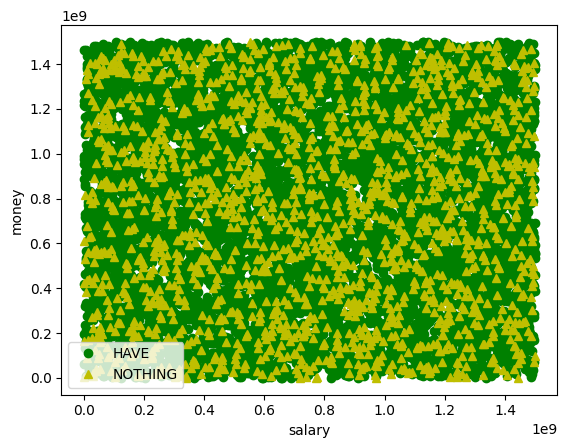

In [29]:
plt.xlabel('salary')
plt.ylabel('money')
plt.plot(arr_financial_products[:,[5]], arr_financial_products[:,[4]], 'go', label='HAVE')
plt.plot(arr_non_financial_products[:,[5]], arr_non_financial_products[:,[4]], 'y^', label='NOTHING')
plt.legend()

In [32]:
from sklearn import datasets
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from yellowbrick.cluster import SilhouetteVisualizer